In [2]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.load_model("../models/inception_superdiag.h5", compile=False)

In [4]:
X_test = np.load("../data/external/X_test.npy", allow_pickle=True)

In [5]:
y_test = np.load("../data/external/y_test.npy", allow_pickle=True)

In [6]:
X_test.shape

(2163, 1000, 12)

In [7]:
y_hat = model.predict(X_test)

In [8]:
y_hat.shape

(2163, 5)

In [9]:
y_hat.argmax(axis=1).shape

(2163,)

In [10]:
y_test.shape

(2163, 5)

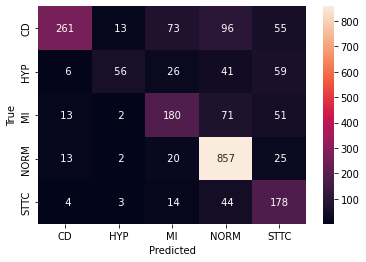

In [55]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)),annot=True, fmt="3d")
plt.xticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.yticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [12]:
y_test[0]

array([0, 0, 0, 1, 0], dtype=int64)

In [13]:
y_hat[0]

array([0.13217297, 0.0056707 , 0.00845337, 0.9394822 , 0.00747377],
      dtype=float32)

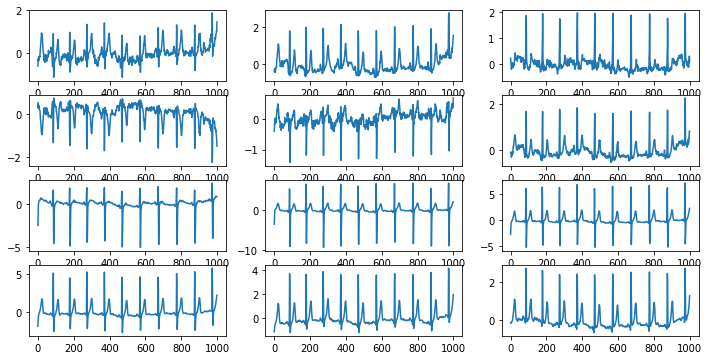

In [14]:
plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(X_test[0][:,i])

In [15]:
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

In [16]:
epsilon = 0.2
adv_x_test = fast_gradient_method(model, X_test[:1], epsilon, np.inf)

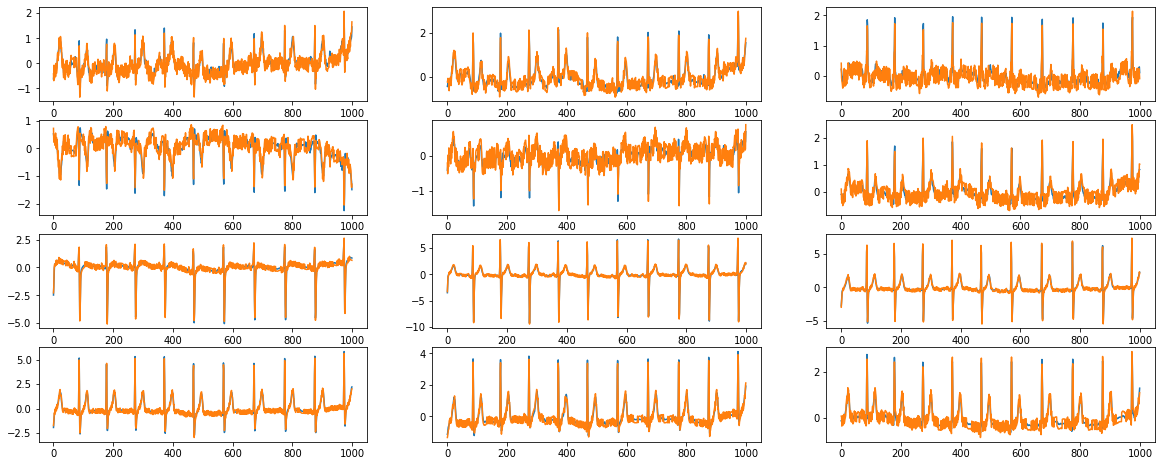

In [17]:
plt.figure(figsize=(20,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(X_test[0][:,i])
    plt.plot(adv_x_test[0,:,i])


In [18]:
target_adv = np.zeros_like(y_test[0])

In [19]:
np.expand_dims(target_adv,-1)

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [73]:
target_adv = np.zeros_like(y_test[0])
TARGET_CLASS = 3
target_adv[TARGET_CLASS] = 1
#target_adv = target_adv.argmax(axis=1)
target_adv = target_adv.argmax()

# Generate adversarial examples
adv_x_test = fast_gradient_method(model, X_test[:1], epsilon, np.inf, y = np.expand_dims(target_adv,-1), clip_min=X_test[:1].min(), clip_max=X_test[:1].max())

In [76]:
y_test[0].argmax()

3

In [78]:
model.predict(adv_x_test).argmax()

0

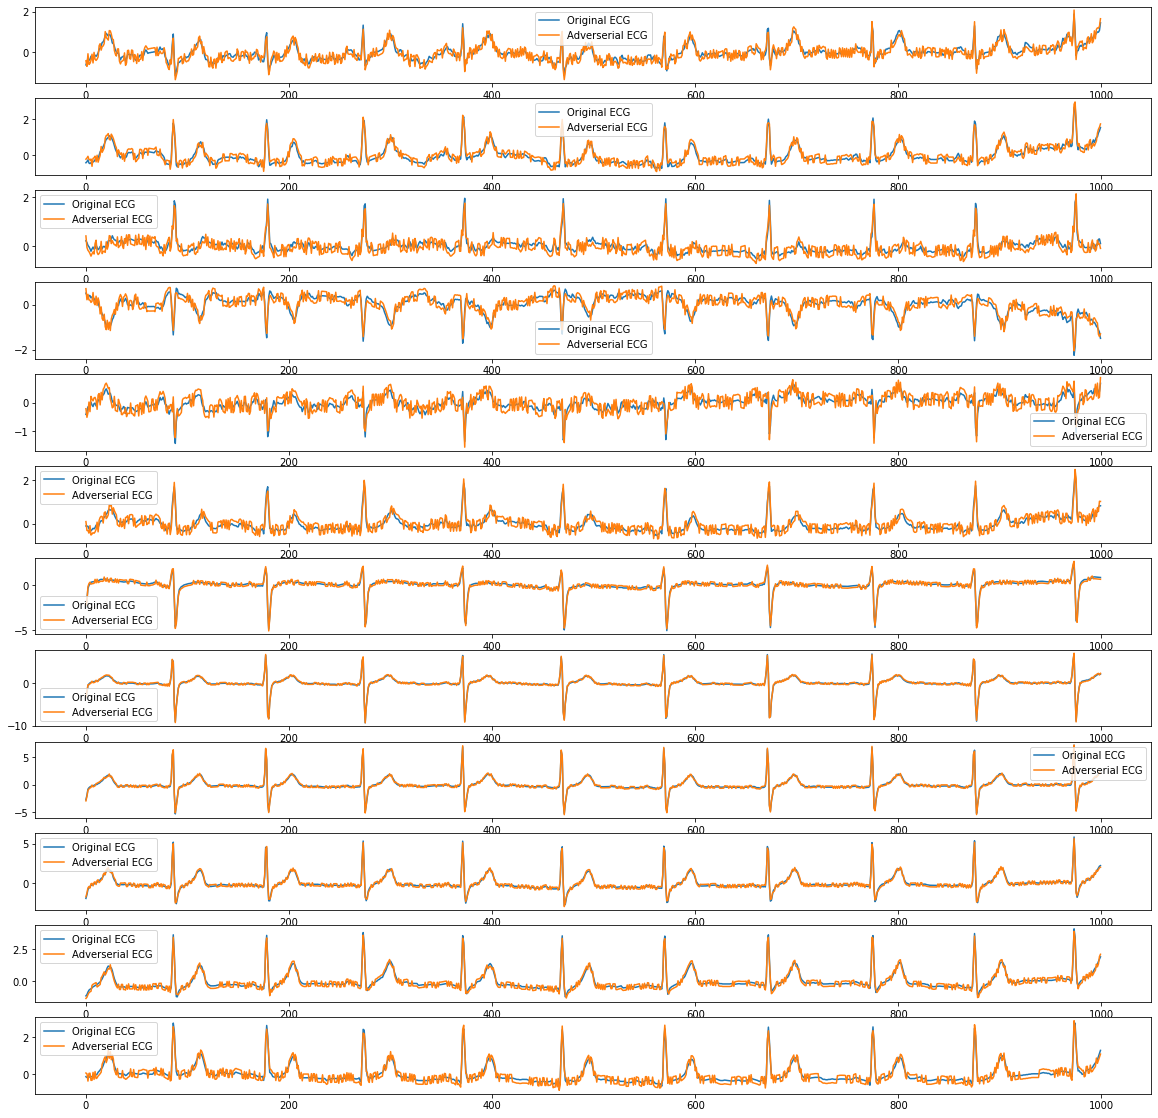

In [74]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(X_test[0][:,i], label= "Original ECG")
    plt.plot(adv_x_test[0,:,i], label= "Adverserial ECG")
    plt.legend()

In [68]:
num = 100
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 3
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)
#target_adv = target_adv.argmax()

# Generate adversarial examples
adv_x_test = fast_gradient_method(model, X_test[:100], epsilon, np.inf, y = target_adv)

In [69]:
adv_pred = model.predict(adv_x_test)

In [70]:
confusion_matrix(y_test[:num].argmax(axis=1), y_hat[:num].argmax(axis=1))

array([[10,  0,  2,  6,  3],
       [ 0,  4,  1,  0,  3],
       [ 0,  0,  7,  3,  0],
       [ 0,  0,  0, 48,  2],
       [ 0,  0,  1,  1,  9]], dtype=int64)

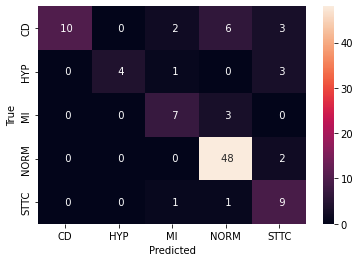

In [71]:
sns.heatmap(confusion_matrix(y_test[:num].argmax(axis=1), y_hat[:num].argmax(axis=1)),annot=True, fmt="3d")
plt.xticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.yticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

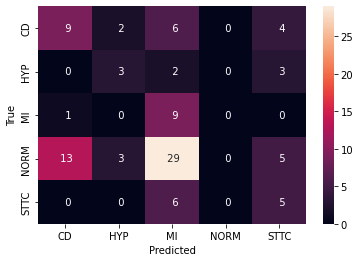

In [72]:
sns.heatmap(confusion_matrix(y_test[:num].argmax(axis=1), adv_pred.argmax(axis=1)),annot=True, fmt="3d")
plt.xticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.yticks(np.arange(5)+0.5,['CD','HYP','MI', 'NORM', 'STTC'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [79]:
from cleverhans.tf2.attacks.basic_iterative_method import basic_iterative_method

In [204]:
epsilon = 0.2
num = 2
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 2
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)

y_attack_target = (np.ones((y_test[:num].shape[0],)) * 1).astype(int)

adv_x_test = basic_iterative_method(model, X_test[:num], eps=epsilon, eps_iter=0.01, nb_iter=250,
                                    #clip_min=0.0, clip_max=1.0, 
                                    norm=np.inf, y=target_adv,
                                   targeted=True, sanity_checks=False)

# Get predicted labels for the test set
y_pred = model.predict(X_test[:num], verbose=0).argmax(axis=1)

# Get predicted labels for the test set
y_pred_adv = model.predict(adv_x_test[:num], verbose=0).argmax(axis=1)

In [205]:
y_pred

array([3, 3], dtype=int64)

In [206]:
y_pred_adv

array([2, 2], dtype=int64)

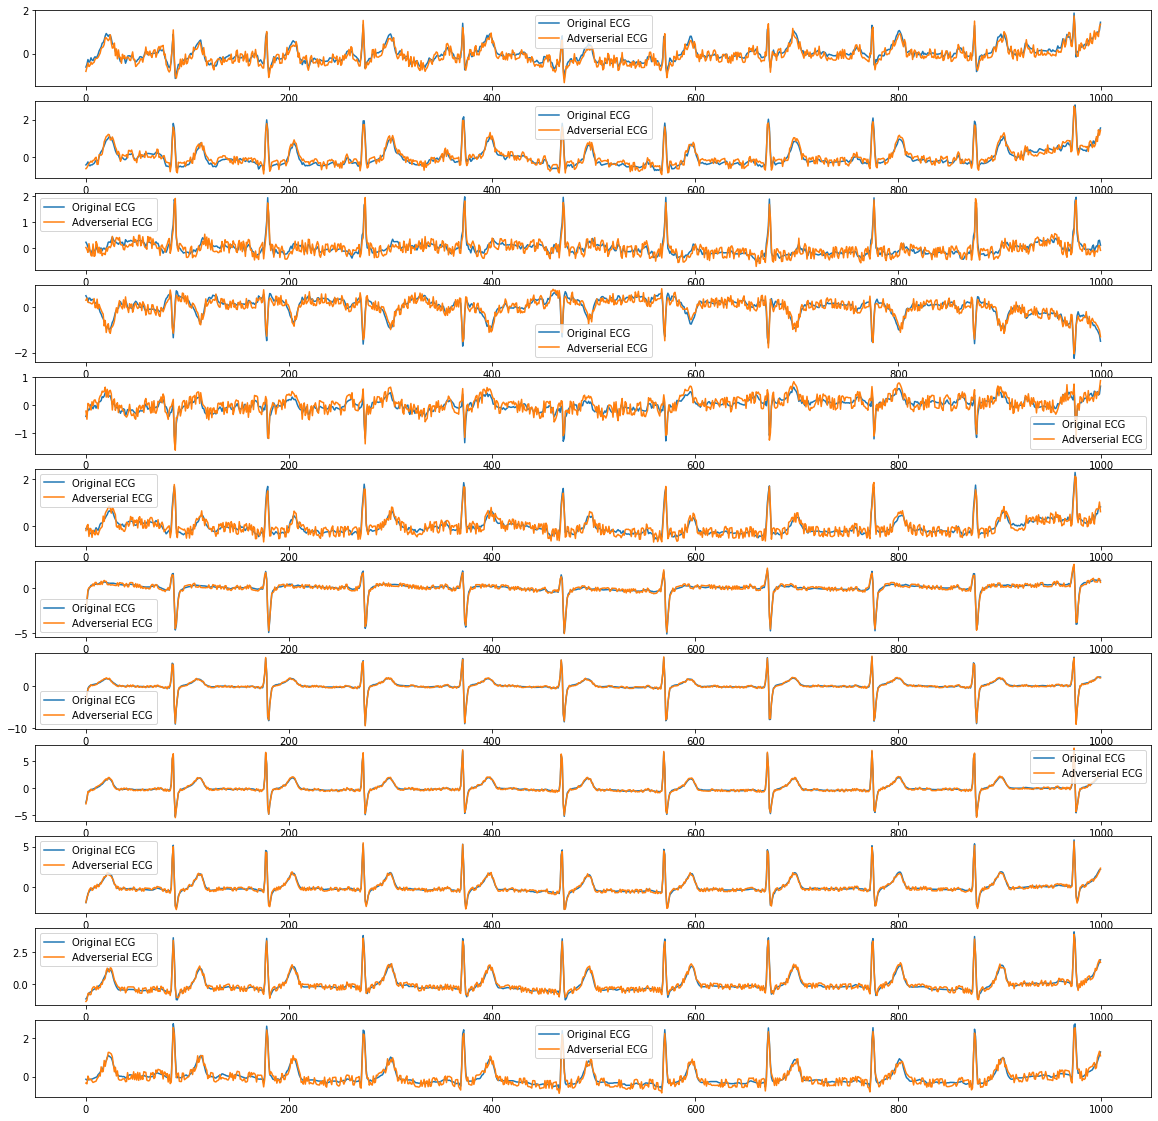

In [207]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(X_test[0][:,i], label= "Original ECG")
    plt.plot(adv_x_test[0,:,i], label= "Adverserial ECG")
    plt.legend()

In [88]:
from cleverhans.tf2.attacks.momentum_iterative_method import momentum_iterative_method

In [96]:
epsilon = 0.2
num = 2
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 2
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)

y_attack_target = (np.ones((y_test[:num].shape[0],)) * 1).astype(int)

adv_x_test = momentum_iterative_method(model, X_test[:num], eps=epsilon, eps_iter=0.01, nb_iter=1000,
                                    #clip_min=0.0, clip_max=1.0, 
                                    norm=np.inf, y=target_adv,
                                   targeted=True, sanity_checks=False)

# Get predicted labels for the test set
y_pred = model.predict(X_test[:num], verbose=0).argmax(axis=1)

# Get predicted labels for the test set
y_pred_adv = model.predict(adv_x_test[:num], verbose=0).argmax(axis=1)

KeyboardInterrupt: 

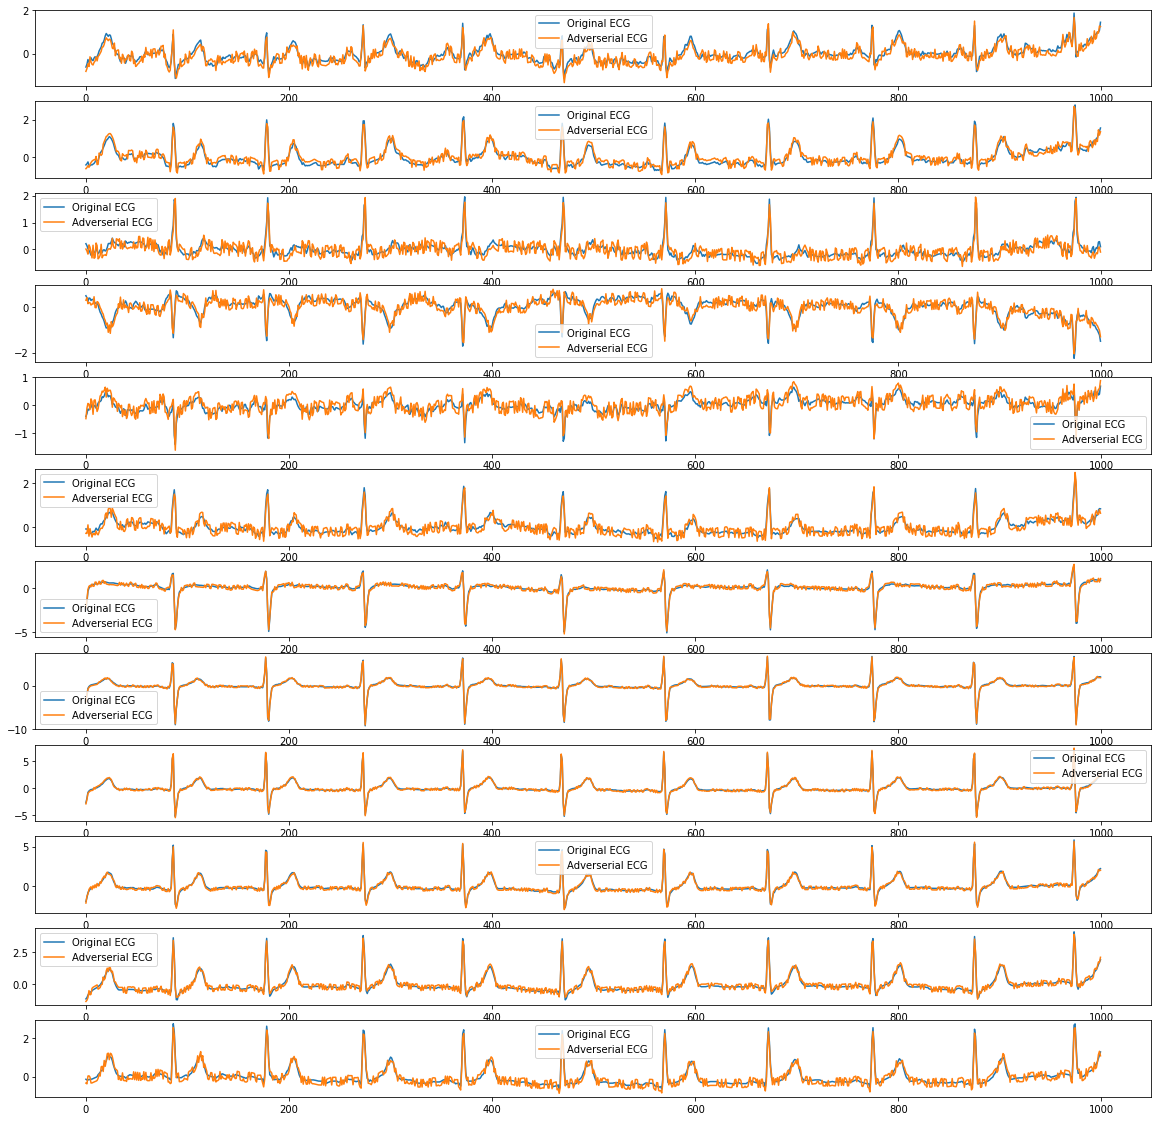

In [92]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(X_test[0][:,i], label= "Original ECG")
    plt.plot(adv_x_test[0,:,i], label= "Adverserial ECG")
    plt.legend()

In [93]:
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent

In [108]:
epsilon = 0.2
num = 2
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 2
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)

y_attack_target = (np.ones((y_test[:num].shape[0],)) * 1).astype(int)

adv_x_test = projected_gradient_descent(model, X_test[:num], eps=epsilon, eps_iter=0.01, nb_iter=200,
                                    #clip_min=0.0, clip_max=1.0, 
                                    norm=np.inf, y=target_adv,
                                   targeted=True, sanity_checks=False)

# Get predicted labels for the test set
y_pred = model.predict(X_test[:num], verbose=0)

# Get predicted labels for the test set
y_pred_adv = model.predict(adv_x_test[:num], verbose=0)
print("Actuall values = ", y_pred)
print("Predicted values = ", y_pred_adv)

Actuall values =  [[0.13217291 0.0056707  0.00845337 0.9394822  0.00747377]
 [0.40609178 0.00681111 0.01311922 0.8374083  0.01481584]]
Predicted values =  [[1.6698739e-05 6.9921516e-05 9.9999905e-01 1.6696033e-05 2.2158027e-04]
 [2.8645914e-05 8.6174230e-05 9.9999893e-01 1.8239960e-05 2.2754073e-04]]


In [118]:
import numpy as np
from scipy.signal import butter, lfilter
# Cutoff frequency (in Hz)
cutoff = 40
# Order of the filter
order = 2
# Sampling frequency of the ECG signal (in Hz)
fs = 100
# Low-pass filter
b, a = butter(order, cutoff/(fs/2), btype='low')
# ECG signal data

# Apply the filter
ecg_filtered = lfilter(b, a, adv_x_test[0])

In [298]:
import neurokit2 as nk

In [ ]:
nk.ecg.ecg_clean()

In [121]:
from scipy.signal import savgol_filter

In [154]:
sav_filt_ecg = savgol_filter(adv_x_test[0], 5, 4, axis=1, #mode="nearest"
                             )

In [155]:
ecg_filtered.shape

(1000, 12)

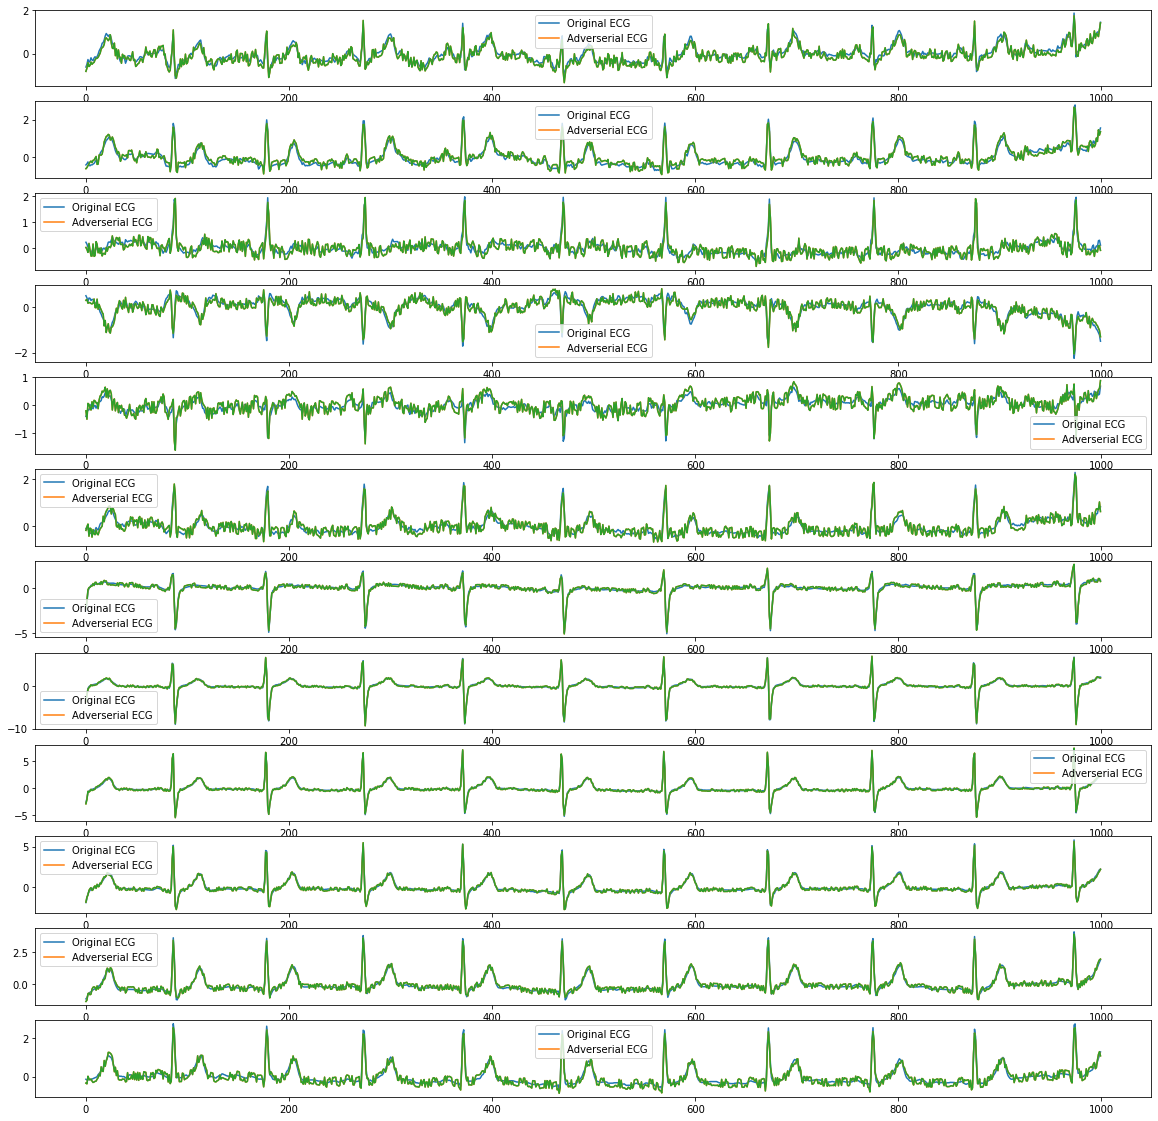

In [156]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(X_test[0][:,i], label= "Original ECG")
    plt.plot(adv_x_test[0,:,i], label= "Adverserial ECG")
    plt.plot(sav_filt_ecg[:,i])
    plt.legend()

In [196]:
from cleverhans.tf2.attacks.carlini_wagner_l2 import carlini_wagner_l2

In [175]:
target_adv

array([2], dtype=int64)

In [187]:
X_test.dtype

dtype('float64')

In [193]:
target_adv

array([[0, 0, 1, 0, 0]], dtype=int64)

In [ ]:
carlini_wagner_l2()

In [199]:
epsilon = 0.2
num = 1
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 1
target_adv[:,TARGET_CLASS] = 1
#target_adv = target_adv.argmax(axis=1)

y_attack_target = (np.ones((y_test[:num].shape[0],)) * 1).astype(int)


adv_x_test = carlini_wagner_l2(model, x = X_test[0].astype("float32"))
"""
adv_x_test = carlini_wagner_l2(model, x = X_test[:1].astype("float32"),
                            batch_size=1, confidence=100.0,
                            targeted=True, y=target_adv,
                            abort_early=True, max_iterations=100,
                            clip_min=X_test[:1].min(), clip_max=X_test[:1].max()
                            )
"""
# Get predicted labels for the test set
y_pred = model.predict(X_test[:num], verbose=0)

# Get predicted labels for the test set
y_pred_adv = model.predict(adv_x_test[:num], verbose=0)
print("Actuall values = ", y_pred)
print("Predicted values = ", y_pred_adv)

CarliniWagnerL2Exception: The input is smaller than the minimum value of 0.0r

In [ ]:
adv_x_test_tmp = carlini_wagner_l2(model, input_img,
                            batch_size=128, confidence=100.0,
                            targeted=True, y=[TARGET_CLASS],
                            abort_early=True, max_iterations=1000,
                            clip_min=0.0, clip_max=1.0)

In [209]:
from cleverhans.tf2.attacks.madry_et_al import madry_et_al

In [210]:
epsilon = 0.2
num = 2
target_adv = np.zeros_like(y_test[:num])
TARGET_CLASS = 2
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)

y_attack_target = (np.ones((y_test[:num].shape[0],)) * 1).astype(int)

adv_x_test = madry_et_al(model, X_test[:num], eps=epsilon, eps_iter=0.01, nb_iter=250,
                                    #clip_min=0.0, clip_max=1.0, 
                                    norm=np.inf, y=target_adv,
                                   targeted=True, sanity_checks=False)

# Get predicted labels for the test set
y_pred = model.predict(X_test[:num], verbose=0).argmax(axis=1)

# Get predicted labels for the test set
y_pred_adv = model.predict(adv_x_test[:num], verbose=0).argmax(axis=1)

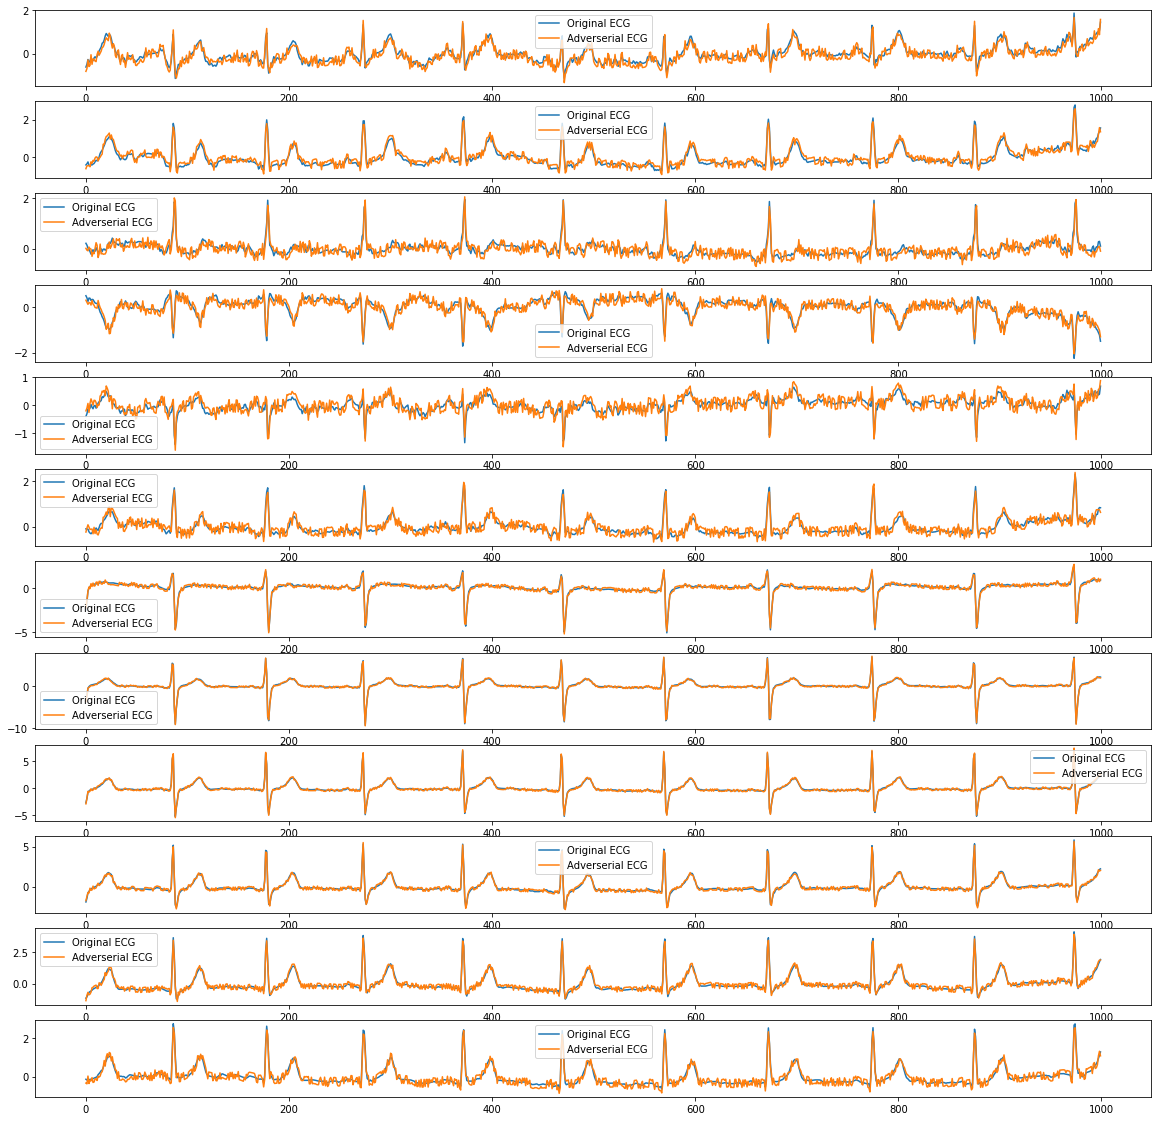

In [211]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(X_test[0][:,i], label= "Original ECG")
    plt.plot(adv_x_test[0,:,i], label= "Adverserial ECG")
    plt.legend()

Custom

In [279]:
model = tf.keras.models.load_model("../models/inception_superdiag.h5", compile=False)

In [243]:
desired_pred = np.array([[0,0,1,0,0]])
desired_pred

array([[0, 0, 1, 0, 0]])

In [244]:
pred_example

array([[0, 0, 0, 1, 0]], dtype=int64)

In [287]:
def optimize_linear(grad, eps):
    """
    Solves for the optimal input to a linear function under a norm constraint.

    Optimal_perturbation = argmax_{eta, ||eta||_{norm} < eps} dot(eta, grad)

    :param grad: tf tensor containing a batch of gradients
    :param eps: float scalar specifying size of constraint region
    :param norm: int specifying order of norm
    :returns:
      tf tensor containing optimal perturbation
    """

    # Convert the iterator returned by `range` into a list.
    axis = list(range(1, len(grad.get_shape())))
    avoid_zero_div = 1e-12

    # Take sign of gradient
    optimal_perturbation = tf.sign(grad)
    # The following line should not change the numerical results. It applies only because
    # `optimal_perturbation` is the output of a `sign` op, which has zero derivative anyway.
    # It should not be applied for the other norms, where the perturbation has a non-zero derivative.
    optimal_perturbation = tf.stop_gradient(optimal_perturbation)
    
    # Scale perturbation to be the solution for the norm=eps rather than norm=1 problem
    scaled_perturbation = tf.multiply(eps, optimal_perturbation)
    return scaled_perturbation

In [ ]:
['CD','HYP','MI', 'NORM', 'STTC']

In [307]:

temp = np.zeros((1,1000,12))
for i in range(12):
    temp[0,:,i] = nk.ecg.ecg_clean(adv_x[0,:,i], sampling_rate=100)
adv_x = temp

In [343]:
num_epochs = 1
eps = 0.001
data_example = X_test[:1]
pred_example = y_test[:1]
desired_pred = np.array([[0,0,0,0,1]])

data_example = tf.convert_to_tensor(data_example)

adv_x = data_example
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
      tape.watch(adv_x)
      pred = model(adv_x)
      loss = tf.keras.losses.categorical_crossentropy(desired_pred, pred)
      loss = -loss
      print(np.asarray(loss))
    grads = tape.gradient(loss, adv_x)
    optimal_perturbation = optimize_linear(grads, eps)
    #print(optimal_perturbation)
    # Add perturbation to original example to obtain adversarial example
    adv_x = adv_x + optimal_perturbation
    temp = np.zeros((1,1000,12))
    for i in range(12):
        temp[0,:,i] = nk.ecg.ecg_clean(adv_x[0,:,i], sampling_rate=100)
    adv_x = temp
    adv_x = tf.convert_to_tensor(adv_x)

    #opt.apply_gradients(zip(grads, model.trainable_variables))

[-7.6423907]


In [359]:
from scipy.ndimage import uniform_filter

In [376]:
num_epochs = 500
eps = 0.01
data_example = X_test[:1]
pred_example = y_test[:1]
desired_pred = np.array([[0,0,1,0,0]])

data_example = tf.convert_to_tensor(data_example)

adv_x = data_example
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
      tape.watch(adv_x)
      pred = model(adv_x)
      loss = tf.keras.losses.categorical_crossentropy(desired_pred, pred)
      loss = -loss
      print(np.asarray(loss))
    grads = tape.gradient(loss, adv_x)
    optimal_perturbation = optimize_linear(grads, eps)
    optimal_perturbation = uniform_filter(optimal_perturbation[0], 15, mode='constant')
    #print(optimal_perturbation)
    # Add perturbation to original example to obtain adversarial example
    adv_x = adv_x + optimal_perturbation

    adv_x = tf.convert_to_tensor(adv_x)

    #opt.apply_gradients(zip(grads, model.trainable_variables))

[-7.5182424]
[-7.498005]
[-7.4765534]
[-7.455258]
[-7.4340754]
[-7.4124074]
[-7.3910394]
[-7.3690186]
[-7.347528]
[-7.3257256]
[-7.304264]
[-7.2816834]
[-7.259745]
[-7.2376122]
[-7.2160335]
[-7.1940675]
[-7.1723423]
[-7.149526]
[-7.1272006]
[-7.104653]
[-7.082769]
[-7.0617876]
[-7.040802]
[-7.0199795]
[-6.999289]
[-6.9775257]
[-6.9563274]
[-6.935276]
[-6.914437]
[-6.893156]
[-6.872497]
[-6.853208]
[-6.8325276]
[-6.8124084]
[-6.7922735]
[-6.7726974]
[-6.752877]
[-6.732524]
[-6.7121153]
[-6.69156]
[-6.6702538]
[-6.6502676]
[-6.629509]
[-6.607325]
[-6.5866175]
[-6.5650244]
[-6.5430145]
[-6.5205503]
[-6.498743]
[-6.4765654]
[-6.454765]
[-6.4327]
[-6.411202]
[-6.389642]
[-6.3679695]
[-6.3467007]
[-6.3243876]
[-6.3023887]
[-6.279988]
[-6.2572904]
[-6.2347703]
[-6.213104]
[-6.1913147]
[-6.169492]
[-6.1462493]
[-6.1228004]
[-6.1002903]
[-6.0778193]
[-6.0543065]
[-6.0300875]
[-6.007631]
[-5.984421]
[-5.960796]
[-5.9372272]
[-5.9132633]
[-5.8893905]
[-5.865855]
[-5.8425097]
[-5.819534]
[-5.79620

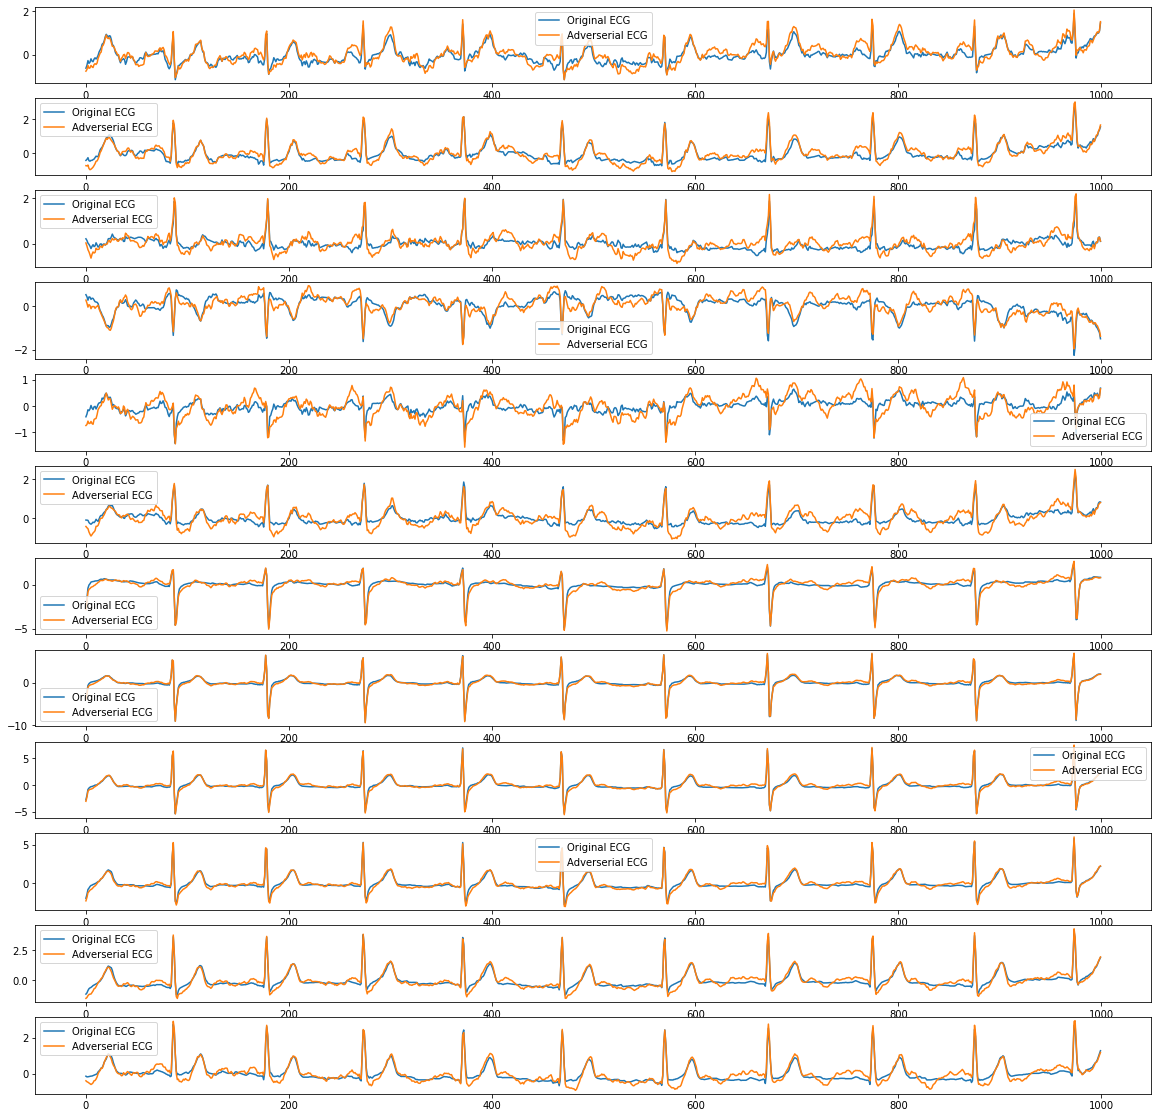

In [377]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(np.asarray(data_example)[0,:,i], label= "Original ECG")
    plt.plot(np.asarray(adv_x)[0,:,i], label= "Adverserial ECG")
    plt.legend()

In [452]:
avd_clean = nk.ecg_clean(np.asarray(adv_x)[0,:,1], sampling_rate=100)
_, rpeaks = nk.ecg_peaks(avd_clean, sampling_rate=100)
segments = nk.ecg_segment(avd_clean, rpeaks = rpeaks["ECG_R_Peaks"], sampling_rate=100)

In [453]:
original_clean = nk.ecg_clean(np.asarray(data_example)[0,:,1], sampling_rate=100)
_, rpeaks = nk.ecg_peaks(original_clean, sampling_rate=100)
original_segments = nk.ecg_segment(original_clean, rpeaks = rpeaks["ECG_R_Peaks"], sampling_rate=100)

In [454]:
new = 0
for i in list(segments.keys())[:-1]:
    new += segments[i]["Signal"]
new = new/len(list(segments.keys())[:-1])

In [455]:
new_orig = 0
for i in list(original_segments.keys())[:-1]:
    new_orig += original_segments[i]["Signal"]
new_orig = new_orig/len(list(original_segments.keys())[:-1])

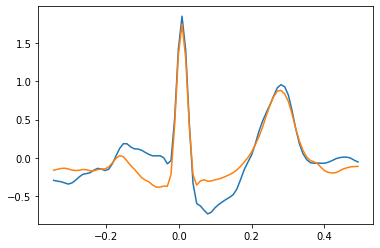

In [456]:
plt.plot(new)
plt.plot(new_orig)

Signal  Index Label
-0.344937 -0.267342     51     1
-0.334844 -0.306402     52     1
-0.324751 -0.318187     53     1
-0.314658 -0.313916     54     1
-0.304565 -0.327300     55     1
...             ...    ...   ...
 0.452395 -0.296007    130     1
 0.462488 -0.222059    131     1
 0.472581 -0.192660    132     1
 0.482674 -0.199919    133     1
 0.492767 -0.205283    134     1

[84 rows x 3 columns]

In [427]:
mean_sig = []
for i in segments.keys():
    mean_sig.append(segments[i]["Signal"])


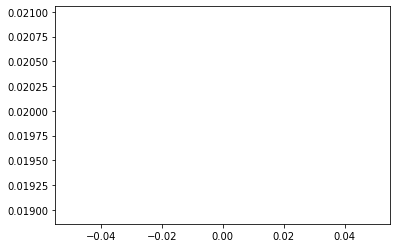

In [428]:
plt.plot(np.nanmean(np.asarray(mean_sig)))

In [400]:
rpeaks["ECG_R_Peaks"]

array([ 86, 178, 273, 372, 469, 570, 672, 775, 875, 974])

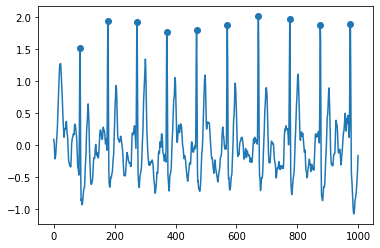

In [402]:
plt.scatter(rpeaks["ECG_R_Peaks"], avd_clean[rpeaks["ECG_R_Peaks"]])
plt.plot(avd_clean)

In [393]:
, rpeaks = rpeaks, sampling_rate=100 

{'ECG_R_Peaks': array([ 87, 179, 274, 373, 470, 571, 673, 776, 876, 974]),
 'sampling_rate': 100}

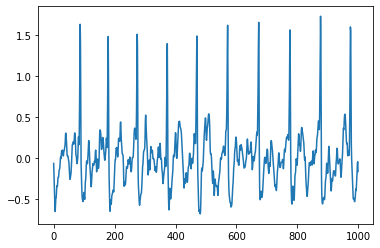

In [392]:
plt.plot(avd_clean)


In [386]:
rpeaks

{'ECG_R_Peaks': array([], dtype=int32), 'sampling_rate': 100}

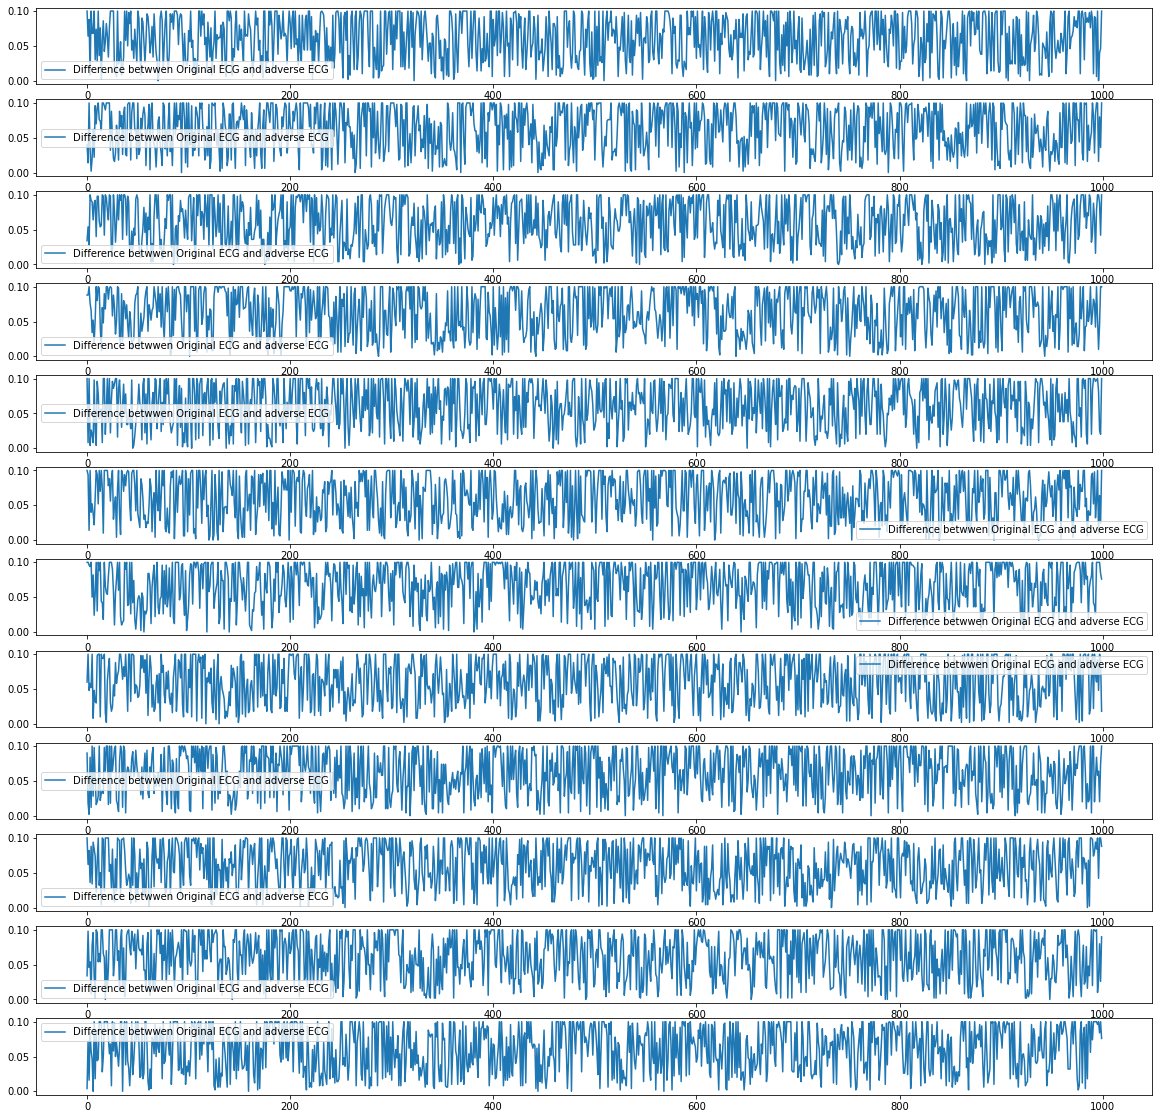

In [296]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(abs(np.asarray(data_example)[0,:,i] - np.asarray(adv_x)[0,:,i]), label= "Difference betwwen Original ECG and adverse ECG")

    plt.legend()

In [260]:
np.asarray(data_example).shape

(1, 1000, 12)

In [220]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [222]:
opt.apply_gradients(zip(gradient, model))

TypeError: 'Functional' object is not iterable

In [219]:
gradient.shape

TensorShape([1, 1000, 12])